# Fourier transforms for reflectometry analysis

## Specular reflectometry

In specular neutron reflectometry, we accept that $q_x = 0$ and $q_y = 0$, which is to say that the neutrons are scattered **only** in the surface normal (perpendicular to the plane of the surface), denoted $z$. 
A result of this is that by applying the [Born approximation](https://en.wikipedia.org/wiki/Born_approximation), the measured reflectometry can be found from the Fourier transform of the **first derivative** of the scattering length density profile with respect to $z$ {cite}`sivia_elementary_2011`.
The sensitivity to the first derivative indicates the importance of the change of the scattering length density profile. 

```{figure} ../figures/fourier.png
---
height: 120px
align: center
name: fourier-relationship
---
The relationship between the scattering length density and the reflectometry profiles, interacting by a Fourier transform.
```

This means that the reflectometry profile, $R(q)$, can be found **under the Born approximation** as follows, 

$$
R(q) \approx \frac{16\pi^2}{q^4} \bigg| \int^{\infty}_{-\infty} \frac{\mathrm{d}\beta}{\mathrm{d}z} \mathrm{exp}(\mathit{i}zq) \;\mathrm{d}z \;\bigg| ^2,
$$

where $\beta(z)$ is the scattering length density profile as a function of $z$. 
````{margin}
```{warning}
The Born approximation is **not** commonly used from reflectometry data analysis. 
It can however be a valuable tool for quick data exploration and is important pedogogically to understand reflectivity analysis. 
```
````

## The example of a single interface

````{margin}
```{note}
This example has been borrowed from the **fantastic** book by Dr Devinder Sivia, "Elementary Scattering Theory: For X-ray and Neutron Users" {cite}`sivia_elementary_2011`. 
```
````
To show the Fourier transform in action, we will first consider the simple example of the interface between air and a flat piece of silicon. 
Let's visualise the scattering length density, $\beta$, profile of this interface.

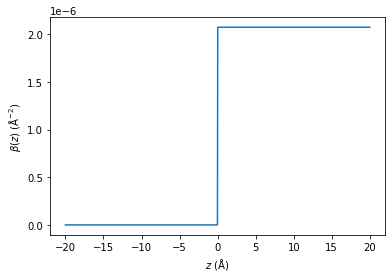

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-20, 20, 1000)
beta = np.zeros_like(z)
beta[np.where(z > 0)] = 2.074e-6
plt.plot(z, beta)
plt.xlabel('$z$ (Å)')
plt.ylabel(r'$\beta(z)$ (Å$^{-2}$)')
plt.show()

The functional description of this interface is a [Heaviside function](https://en.wikipedia.org/wiki/Heaviside_step_function), 

$\beta(z) = \begin{cases}2.074\times10^{-6}\;\text{Å}^{-2},&z>0\\0,&z\leq 0\end{cases}, $ 

and the first derivative of this is a scaled-[delta function](https://en.wikipedia.org/wiki/Dirac_delta_function), where the scaling is the change observed in the Heaviside function. 
This first derivative is shown below. 

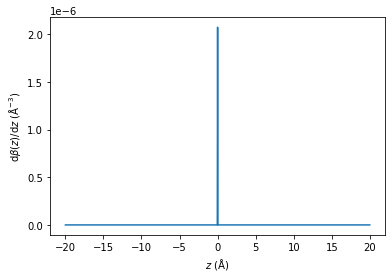

In [2]:
plt.plot(z[:-1] + np.diff(z) * 0.5, np.diff(beta))
plt.xlabel('$z$ (Å)')
plt.ylabel(r'$\mathrm{d}\beta(z)/\mathrm{d}z$ (Å$^{-3}$)')
plt.show()

The scaled-delta function can be written as, 

$$
\frac{\mathrm{d}\beta(z)}{\mathrm{d}z} = \beta_{\mathrm{Si}} \delta(z),
$$

where, $\beta_{\mathrm{Si}}$ is the scattering length density of silicon ($2.871\times 10^{-6}$ Å<sup>-2</sup>). 
We can then rewrite the reflectometry equation above as, 

$$
R(q) \approx \frac{16\pi^2}{q^4} \bigg| \int^{\infty}_{-\infty} \beta_{\mathrm{Si}}\delta(z) \mathrm{exp}(\mathit{i}zq) \;\mathrm{d}z \;\bigg| ^2 = \frac{16\pi^2}{q^4} \bigg| \;\beta_{\mathrm{Si}} \mathrm{exp}(0) \;\bigg| ^2 = \frac{16\pi^2\beta_{\mathrm{Si}}^2}{q^4}.
$$

We can plot this as a function of $q$.

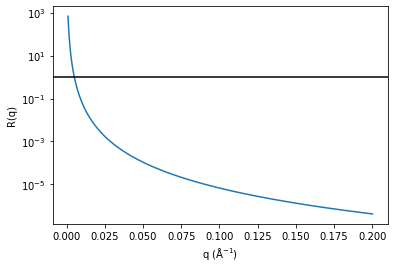

In [3]:
q = np.linspace(0.001, 0.2, 500)
plt.plot(q, 16 * np.pi ** 2 * 2.074e-6 ** 2 / (q ** 4))
plt.axhline(1, c='k')
plt.xlabel('q (Å$^{-1}$)')
plt.ylabel('R(q)')
plt.yscale('log')
plt.show()

The blue line in the figure above shows the reflectometry profile found using the Born approximation for a single silicon-air interface. 
After another example, we will investigate the meaning of the black horizontal line.

If the step function was at 10 Å instead of 0 Å, we would have a scattering length density profile (and first derivative) as shown below. 

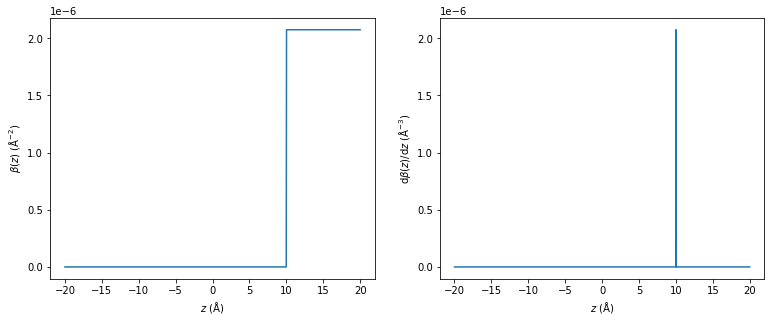

In [4]:
z = np.linspace(-20, 20, 1000)
beta = np.zeros_like(z)
beta[np.where(z > 10)] = 2.074e-6

fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))

ax[0].plot(z, beta)
ax[0].set_xlabel('$z$ (Å)')
ax[0].set_ylabel(r'$\beta(z)$ (Å$^{-2}$)')

ax[1].plot(z[:-1] + np.diff(z) * 0.5, np.diff(beta))
ax[1].set_xlabel('$z$ (Å)')
ax[1].set_ylabel(r'$\mathrm{d}\beta(z)/\mathrm{d}z$ (Å$^{-3}$)')

plt.show()

This offset Heaviside function can be written as,

$$
\beta(z) = \begin{cases}2.074\times10^{-6}\;\text{Å}^{-2},&z>10\\0,&z\leq 10\end{cases},
$$ 

the first derivative of which is, 

$$
\frac{\mathrm{d}\beta(z)}{\mathrm{d}z} = \beta_{\mathrm{Si}} \delta(z-10).
$$

This leads to the following result from the Born approximation,

$$
R(q) \approx \frac{16\pi^2}{q^4} \bigg| \int^{\infty}_{-\infty} \beta_{\mathrm{Si}}\delta(z-10) \mathrm{exp}(\mathit{i}zq) \;\mathrm{d}z \;\bigg| ^2 = \frac{16\pi^2}{q^4} \bigg| \;\beta_{\mathrm{Si}} \mathrm{exp}(i10q) \;\bigg| ^2 = \frac{16\pi^2\beta_{\mathrm{Si}}^2}{q^4}.
$$

This is the same result for the reflectometry as shown above.

## An oxide layer

Let's look again at a smooth sample of silicon, however, this time, a 20 Å layer of silicon dioxide has formed on top of it. 
The scattering length density profile for this system is shown below, where $\beta_{\mathrm{Si}} = 2.074\times 10^{-6}$ Å<sup>-2</sup> and $\beta_{\mathrm{SiO_2}} = 4.186\times 10^{-6}$ Å<sup>-2</sup>.

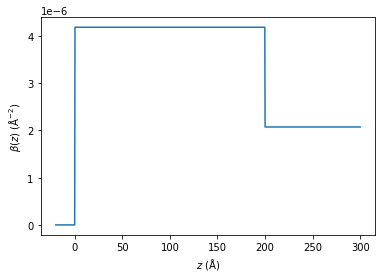

In [5]:
z = np.linspace(-20, 300, 1000)
beta = np.zeros_like(z)
beta[np.where((z > 0) & (z < 200))] = 4.186e-6
beta[np.where(z > 200)] = 2.074e-6
plt.plot(z, beta)
plt.xlabel('$z$ (Å)')
plt.ylabel(r'$\beta(z)$ (Å$^{-2}$)')
plt.show()

Again we can right this as a series of Heaviside functions, 

$$
\beta(z) = \begin{cases}4.186\times10^{-6}\;\text{Å}^{-2},&z > 200\\
            2.074\times10^{-6}\;\text{Å}^{-2},&0<z<200\\
            0,&z\leq 0\end{cases}.
$$

The first derivative of this is, 

$$
\frac{\mathrm{d}\beta(z)}{\mathrm{d}z} = \beta_{SiO_2} - \beta_{Si} \delta(z - 200) - \beta_{SiO_2}\delta(z).
$$

Again, we can find the derivative of this scattering length density profile and plot this. 

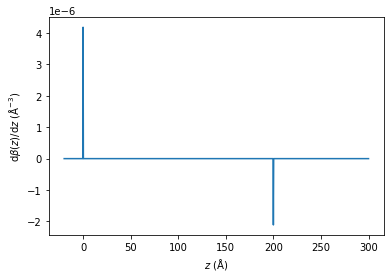

In [6]:
plt.plot(z[:-1] + np.diff(z) * 0.5, np.diff(beta))
plt.xlabel('$z$ (Å)')
plt.ylabel(r'$\mathrm{d}\beta(z)/\mathrm{d}z$ (Å$^{-3}$)')
plt.show()

Then, to calculate the Born approximated reflected intensity, we use the square magnitude of the Fourier transform and scale by $16 \pi^2 / q ^4$.

$$
\begin{aligned}
R(q) & \approx \frac{16\pi^2}{q^4} \bigg| \int^{\infty}_{-\infty} \beta_{SiO_2} - \beta_{Si} \delta(z - 200) - \beta_{SiO_2}\delta(z) \mathrm{exp}(\mathit{i}zq) \;\mathrm{d}z \;\bigg| ^2 \\
& = \frac{16\pi^2}{q^4} \bigg| \;(\beta_{SiO_2}-\beta_{Si})\mathrm{exp}(\mathit{i}200q) - \beta_{SiO_2} \;\bigg| ^2 \\
& = \frac{16\pi^2}{q^4}\big[\beta_{SiO_2}^2 + (\beta_{SiO_2} - \beta_{Si})^2 - 2 \beta_{SiO_2} (\beta_{SiO_2} - \beta_{Si}) \cos{(200 q)}\big],
\end{aligned}
$$

We calculate this numerically below. 

In [7]:
def reflectivity(q: np.ndarray, beta:np.ndarray, z: np.ndarray) -> np.ndarray:
    """
    :param q: array of q-wavevectors
    :param beta: scattering length density profile
    :param z: z-dimension values for beta
    :returns: calculated reflectivity
    """
    fourier_transform = (np.diff(beta) * np.exp(-1j * z[:-1] * q[:, np.newaxis])).sum(-1)
    return 16 * np.pi ** 2 / (q ** 4) * np.square(np.abs(fourier_transform))

The result for the oxide layer system is plotted below. 

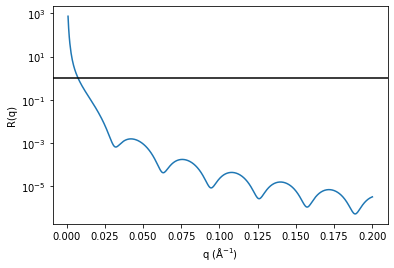

In [8]:
q = np.linspace(0.001, 0.2, 500)
r = reflectivity(q, beta, z)
plt.plot(q, r)
plt.axhline(1, c='k')
plt.xlabel('q (Å$^{-1}$)')
plt.ylabel('R(q)')
plt.yscale('log')
plt.show()

The reflectivity data above is the result of the reflection of our radiation from the two interface in our material. 
This leads to the distinctive diffraction-like interference pattern. 
The cosine function in the Born approximation can be used to rationalise the interference fringes, where they appear at a separation of $2\pi / 200$. 

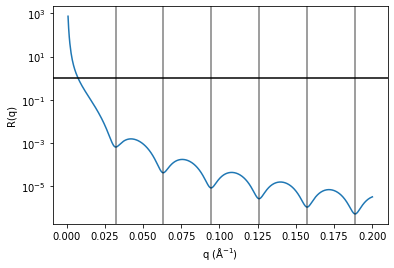

Calculated thickness = 200.46 +/- 1.25 Å


In [9]:
from scipy.signal import find_peaks

peaks = find_peaks(-r)[0]
plt.plot(q, r)
for i in peaks:
    plt.axvline(q[i], c='k', alpha=0.5)
plt.axhline(1, c='k')
plt.xlabel('q (Å$^{-1}$)')
plt.ylabel('R(q)')
plt.yscale('log')
plt.show()

distances = 2 * np.pi / np.diff(q[peaks])
print(f'Calculated thickness = {np.mean(distances):.2f} +/-'
      f' {np.std(distances):.2f} Å')

Therefore, for a simple dataset, we can quickly use the Born approximation to gain an understanding of the thickness of the layer in our system. 
This is achieved by investigating the q-dependence of the fringes in our data. 

In the plots abouve the blue line shows the reflectometry profile. 
The horizontal black line shows where $R(q) = 1$, indicating that using this approach, as $q$ tends towards $0$ the number of reflected neutrons becomes **greater than** the number of neutrons incident on the sample.
This **unphysical result** is due, in part, to the utilisation of the Born approximation (this is discussed in detail on pg. 104 of "Elementary Scattering Theory: For X-ray and Neutron Users" {cite}`sivia_elementary_2011`.)
````{margin}
```{warning}
Reflected intensity is **explicitly** defined as the number of reflected neutrons divided by the number of incident neutrons as a function of $q$. 
```
````

## Using the Born approximation

In addition to the unphysical intensities that can be produced from a Born approximation model, the **phase problem** is present in this methodology.
The [phase problem](https://en.wikipedia.org/wiki/Phase_problem) is the loss of the radiation phase on physical measurement. 
This means that, as we will show below, although the thickness information may be available from an inverse Fourier transform of measured data. 
A full analysis is **not possible** without the use of some phase retrival methodology {cite}`majkrzak_phase_1998`. 
````{margin}
```{note}
If you have studied crystallography, you should be familiar with the **phase problem**.
```
````

These issues do not render the Born approximation useless in reflectometry analysis. 
Instead, it can be used as a quick tool to **estimate** the thickness of some layered material from a reflectometry profile. 
We can perform an inverse Fourier transform as follows, 

$$
\mathrm{ACF}(z) = \frac{1}{16\pi^2}\int^{\infty}_{-\infty} q^4 R(q) \exp(\mathit{i}zq) \;\mathrm{d}q, 
$$

to obtain the **autocorrelation function** (ACF) for our data. 
The ACF can be thought of as a noisy version of our first derivative of the scattering length density profile. 

In [10]:
def autocorrelation(q:np.ndarray, r: np.ndarray, z:np.ndarray) -> np.ndarray:
    """
    :param q: array of q-wavevectors
    :param r: measured reflectometry
    :param z: range for z-dimension values
    :returns: normalised autocorrelation function.
    """
    inv_fourier_transform = (q ** 4 * r * np.exp(1j * q * z[:, np.newaxis])).sum(-1) 
    return inv_fourier_transform / (16 * np.pi ** 2)

The noise is due to the limited $q$-range and resolution from our measurement, below we show the effect of different values of $q_{\mathrm{max}}$. 

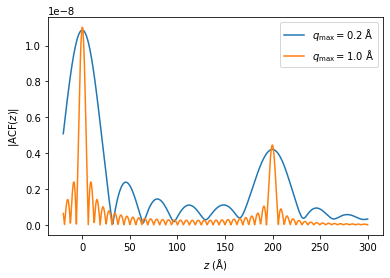

In [11]:
q2 = np.linspace(0.001, 1, 500)
r2 = reflectivity(q2, beta, z)
acf = autocorrelation(q, r, z)
acf2 = autocorrelation(q2, r2, z)
plt.plot(z, np.abs(acf), label='$q_{\mathrm{max}} = 0.2$ Å')
plt.plot(z, np.abs(acf2), label='$q_{\mathrm{max}} = 1.0$ Å')
plt.xlabel('$z$ (Å)')
plt.ylabel('|ACF($z$)|')
plt.legend()
plt.show()

Note, that the large peaks are at $0$ Å and $200$ Å, indicating that the structure in our data is in the region of $200$ Å in thickness, which matches the layer that was used to produce this data. 